# Avaliação Imobiliária
## Regressão Linear Múltipla
### Importações

In [51]:
from avaliacao                            import amostra_transformada, comb_amostra, comb_print, cont_resid, dist_resid, exclui_outlier, \
                                                 stepwise, transformada
from scipy.stats                          import kstest, shapiro
from statsmodels.compat                   import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools          import durbin_watson
from statsmodels.tools.tools              import add_constant

import matplotlib.pyplot     as plt
import numpy                 as np
import pandas                as pd
import pickle
import seaborn               as sns
import statsmodels.api       as sm
import statsmodels.stats.api as sms

### Importação dos Dados

In [52]:
amostra = pd.read_csv("amostra.csv", sep=';', decimal=",", thousands='.')

### Análise Estatística
#### Regressão Linear Múltipla Inicial

In [53]:
X = sm.add_constant(amostra.drop(['Unitario'], axis=1))
Y = amostra['Unitario']
modelo = sm.OLS(Y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               Unitario   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     27.06
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.77e-18
Time:                        19:51:25   Log-Likelihood:                -2256.6
No. Observations:                 240   AIC:                             4523.
Df Residuals:                     235   BIC:                             4541.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.368e+04    601.705     22.743      0.0

#### Procedimento Stepwise

In [54]:
modelo_sw = stepwise(modelo, X, Y)
modelo_sw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Unitario   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     50.39
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           5.82e-19
Time:                        19:51:25   Log-Likelihood:                -2259.5
No. Observations:                 240   AIC:                             4525.
Df Residuals:                     237   BIC:                             4535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.33e+04    395.953     33.601      0.000    1.25e+04    1.41e+04
Area         -36.6718      4.631     -7.920      0.000     -45.794     -27.550
Vagas       3202.1550    324.618      9.864      0.000    2562.650    3841.660
==============================================================================
Omnibus:                       19.558   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.825
Skew:                           0.640   Prob(JB):                     1.11e-05
Kurtosis:                       3.804   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regressão Linear Múltipla com Transformações
##### Função para Montar as Combinações

In [55]:
combs = comb_amostra(amostra, combN = 7)
len(combs)

16807

#### Cálculo da Amostra Transformada

In [56]:
amostra_transf = amostra_transformada(amostra, combs)

 comb = 60

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 117

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 173

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 245

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 305

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 359

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 412

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 464

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 539

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 591

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 647

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 701

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 759

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 834

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 898

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 944

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 998

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 1053

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 1129

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 1189

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 1245

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 1301

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 1371

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 1428

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 1484

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 1537

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 1594

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 1667

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 1730

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 1784

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 1842

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 1912

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 1972

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 2024

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 2077

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 2128

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 2205

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 2261

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 2317

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 2372

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 2429

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 2500

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 2563

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 2619

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 2694

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 2751

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 2808

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 2859

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 2914

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 2985

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3037

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3090

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3148

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3202

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 3258

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 3321

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3376

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3423

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3474

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3526

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3576

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3619

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3672

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3719

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3769

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3818

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3867

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3915

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 3967

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 4018

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 4075

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 4127

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 4177

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 4227

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 4275

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 4323

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 4368

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 4416

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 4465

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 4517

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 4570

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 4623

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 4675

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 4722

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 4774

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 4821

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 4868

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 4916

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 4965

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 5011

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 5061

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 5112

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 5164

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 5216

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 5278

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 5332

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 5382

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 5425

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 5480

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 5532

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 5582

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 5636

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 5694

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 5747

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 5798

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 5848

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 5898

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 5943

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 5989

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 6029

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 6084

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 6132

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 6179

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 6235

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 6282

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 6331

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 6382

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 6433

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 6486

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 6536

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 6585

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 6636

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 6688

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 6756

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 6803

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 6851

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 6904

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 6955

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7002

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7033

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7098

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7143

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7194

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7245

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7294

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7343

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7394

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7446

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7498

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7558

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7612

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 7659

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 7706

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 7756

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 7805

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 7850

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 7902

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 7955

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 8009

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 8079

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8131

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8185

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8245

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8289

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 8338

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8388

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8437

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8485

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8534

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8584

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8637

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8687

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 8734

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 8783

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 8828

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 8875

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8924

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 8975

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9024

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9069

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9123

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9173

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9220

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9270

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9324

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9376

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 9426

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 9477

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 9529

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 9598

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9649

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9701

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9753

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9810

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 9865

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 9916

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 9966

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 10012

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 10063

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 10110

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 10158

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 10206

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 10253

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 10300

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 10352

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 10404

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 10459

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 10531

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 10580

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 10626

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 10670

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 10719

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 10771

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 10823

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 10874

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 10922

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 10970

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11021

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11073

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11125

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11182

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11230

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11281

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11329

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 11379

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 11430

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 11483

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 11535

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 11589

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 11651

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11703

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11758

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11810

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11863

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11913

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 11963

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12008

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12061

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12111

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12156

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12211

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12263

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12313

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 12362

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 12407

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 12456

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 12503

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 12553

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12606

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12649

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 12692

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12748

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12801

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 12851

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 12901

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 12951

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 13000

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 13050

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 13101

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 13151

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 13198

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 13251

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 13302

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 13372

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 13427

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 13485

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 13538

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 13592

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 13641

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 13693

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 13763

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 13812

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 13863

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 13914

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 13966

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14022

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14073

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14124

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 14171

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 14220

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 14269

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 14318

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14370

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 14424

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 14477

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 14549

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14603

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14625

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14693

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14749

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14799

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14859

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 14910

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 14964

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 15018

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 15088

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 15140

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 15192

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 15249

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 15300

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarnin

 comb = 15352

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 15402

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 15454

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 15508

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 15579

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 15630

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 15682

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 15740

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 15794

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 15848

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 15922

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 15974

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 16035

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 16084

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 16134

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by z

 comb = 16186

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enc

 comb = 16234

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 16287

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountere

 comb = 16339

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

 comb = 16408

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 16456

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 16511

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 16564

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 16619

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 16669

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 16718

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 16769

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: Runtim

 comb = 16807

/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mc/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divi

#### Salva Amostra Transformada

In [57]:
amostra_transf_arq = open('amostra_transf.dat', 'wb')
pickle.dump(amostra_transf, amostra_transf_arq, pickle.HIGHEST_PROTOCOL)
amostra_transf_arq.close()

#### Carrega Amostra Transformada

In [58]:
amostra_transf_arq = open('amostra_transf.dat', 'rb')
amostra_transf = pickle.load(amostra_transf_arq)
amostra_transf_arq.close()

### Cálculo das Equações

In [59]:
modelo_comb = []
rsquared_comb = []
modelo_comb_arq = open('modelo_comb.dat', 'wb')
for i in range(len(amostra_transf)):
    print('\r comb = {0}'.format(i+1), end='', flush=True)
    valoresX = amostra_transf[i].drop(['Unitario'], axis=1)
    modelo_comb = sm.OLS(amostra_transf[i]['Unitario'], sm.add_constant(valoresX)).fit()
    # modelo_comb.append(sm.OLS(amostra_transf[i]['Unitario'], sm.add_constant(valoresX)).fit())
    rsquared_comb.append(modelo_comb.rsquared)

    pickle.dump(modelo_comb, modelo_comb_arq, pickle.HIGHEST_PROTOCOL)

modelo_comb_arq.close()
print("\n")

 comb = 16807



### Imprimindo as 10 melhores

In [60]:
resultados = sorted(list(enumerate(rsquared_comb)), key=lambda x:x[1], reverse = True)[0:10]
for resultado in resultados:
    print("{0} - {1} - {2} - {3}{4}".format(resultado[0], \
                                      resultado[1], \
                                      tuple(amostra.columns), \
                                      combs[resultado[0]], \
                                      comb_print(combs[resultado[0]])))

5641 - 0.46694030826708177 - ('Area', 'Quartos', 'Banheiros', 'Vagas', 'Unitario') - (2, 2, 3, 0, 6) - ln(x) - ln(x) - x² - x - √(1/x)
7013 - 0.46664171407031463 - ('Area', 'Quartos', 'Banheiros', 'Vagas', 'Unitario') - (2, 6, 3, 0, 6) - ln(x) - √(1/x) - x² - x - √(1/x)
6327 - 0.46584218774747443 - ('Area', 'Quartos', 'Banheiros', 'Vagas', 'Unitario') - (2, 4, 3, 0, 6) - ln(x) - √x - x² - x - √(1/x)
5298 - 0.4654907093301466 - ('Area', 'Quartos', 'Banheiros', 'Vagas', 'Unitario') - (2, 1, 3, 0, 6) - ln(x) - 1/x - x² - x - √(1/x)
4955 - 0.4632242930553053 - ('Area', 'Quartos', 'Banheiros', 'Vagas', 'Unitario') - (2, 0, 3, 0, 6) - ln(x) - x - x² - x - √(1/x)
6670 - 0.4626235990796975 - ('Area', 'Quartos', 'Banheiros', 'Vagas', 'Unitario') - (2, 5, 3, 0, 6) - ln(x) - 1/x² - x² - x - √(1/x)
5494 - 0.46076783815654265 - ('Area', 'Quartos', 'Banheiros', 'Vagas', 'Unitario') - (2, 2, 0, 0, 6) - ln(x) - ln(x) - x - x - √(1/x)
6866 - 0.4602813082492563 - ('Area', 'Quartos', 'Banheiros', 'Vagas'

### Seleciona a Equação/Modelo/Amostra Desejada

In [61]:
modelo_n = 4955

i = 0
with open('modelo_comb.dat', 'rb') as modelo_comb_arq:
    for i in range(len(combs)):
        if i <= modelo_n:
            modelo_comb_n = pickle.load(modelo_comb_arq)
        else:
            break

modelo_comb_arq.close()
modelo_comb_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Unitario   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     50.70
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           9.87e-31
Time:                        19:53:24   Log-Likelihood:                 1288.8
No. Observations:                 240   AIC:                            -2568.
Df Residuals:                     235   BIC:                            -2550.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.182      0.856      -0.001       0.002
Area           0.0026      0.000     10.803      0.000       0.002       0.003
Quartos       -0.0004      0.000     -2.701      0.007      -0.001      -0.000
Banheiros  -6.213e-05   2.12e-05     -2.933      0.004      -0.000   -2.04e-05
Vagas         -0.0014      0.000    -11.198      0.000      -0.002      -0.001
==============================================================================
Omnibus:                       66.555   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.848
Skew:                           1.002   Prob(JB):                     2.13e-70
Kurtosis:                       8.298   Cond. No.                         89.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estima Valor para Imóvel Desejado

In [62]:
#('Area', 'Quartos', 'Banheiros', 'Vagas', 'Unitario') - (2, 0, 3, 0, 6) - ln(x) - x - x² - x - √(1/x)
1/(modelo_comb_n.predict([1, np.log(100), 2, 2**2, 0])[0])**2

8136.690847487345

### Conta os resíduos

In [63]:
cont_resid(modelo_comb_n, residMax = 2)

7

### Elimina os Dados Discrepantes

In [64]:
amostra_transf_n_so, modelo_comb_n_so, amostra_so, qtdExc = exclui_outlier(amostra_transf[modelo_n], modelo_comb_n, amostra, R2_alvo = 0.75, residMax = 1.7)
print(modelo_comb_n_so.summary())

Quantidade de outliers excluídos:
92
                            OLS Regression Results                            
Dep. Variable:               Unitario   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           2.33e-42
Time:                        19:53:24   Log-Likelihood:                 923.44
No. Observations:                 148   AIC:                            -1837.
Df Residuals:                     143   BIC:                            -1822.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

### Conta os resíduos

In [65]:
cont_resid(modelo_comb_n_so, residMax = 3)

0

### Salva amostra original para o SisDEA

In [66]:
amostra_so.to_csv('amostra_so_dp.csv', sep=';', decimal=",", index=False)

### Estima Novo Valor para Imóvel Desejado

In [67]:
#('Area', 'Quartos', 'Banheiros', 'Vagas', 'Unitario') - (2, 0, 3, 0, 6) - ln(x) - x - x² - x - √(1/x)
1/(modelo_comb_n_so.predict([1, np.log(100), 2, 2**2, 0])[0])**2

8806.423284483866

### Parâmetros do Modelo

In [68]:
modelo_comb_n_so.params

const        0.002178
Area         0.002015
Quartos     -0.000226
Banheiros   -0.000087
Vagas       -0.000986
dtype: float64

### Verificações
#### Resíduos Padronizados

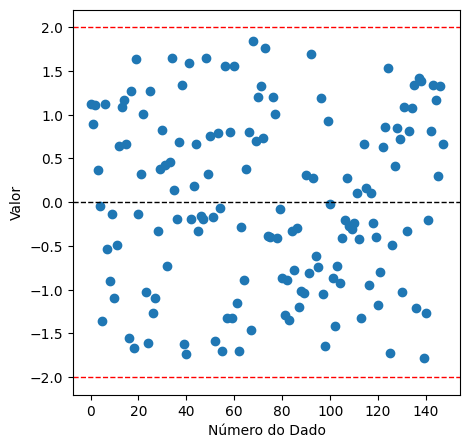

In [69]:
#create instance of inflinfluenceuence
influence = modelo_comb_n_so.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

#display standardized residuals
standardized_residuals

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
#fig.suptitle('Resíduos Padronizados', fontsize=16)
plt.scatter(amostra_so.index, standardized_residuals)
plt.xlabel('Número do Dado')
plt.ylabel('Valor')
plt.axhline(y=2, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-2, color='red', linestyle='--', linewidth=1)
plt.show()

#### Aderência

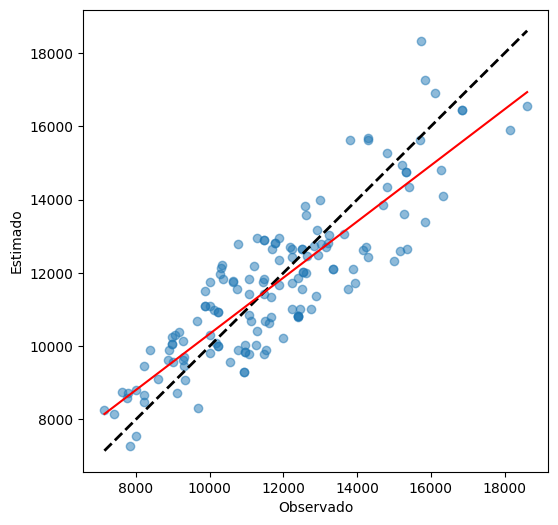

In [70]:
# Making predictions using the linear regression model
y_test = amostra_so['Unitario']
y_pred_lr = (1/modelo_comb_n_so.predict()**2)

#calculate equation for trendline
z = np.polyfit(y_test, y_pred_lr, 1)
p = np.poly1d(z)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.plot([y_test.min(), y_test.max()], p([y_test.min(), y_test.max()]), 'r-', label='OLS Trendline')
plt.xlabel('Observado')
plt.ylabel('Estimado')
#plt.title('Aderência')
plt.show()

#### Normalidade dos Resíduos
##### Teste de Shapiro
Shapiro test verifica se a hipótese nula (não normalidade) está presente
ou seja, tem que ser maior do que 0,05.
Porém, o teste de Shapiro é muito sensível e para grandes amostras pode dar um falso anormal.

In [71]:
shapiro(modelo_comb_n_so.resid)

ShapiroResult(statistic=0.9601334929466248, pvalue=0.0002801429945975542)

##### Teste de Kolmogorov-Smirnov
Devido à sensibilidade do Teste de Shapiro, é interessante rodar o teste de Kolmogorov-Smirnov

In [72]:
kstest(modelo_comb_n_so.resid, 'norm')

KstestResult(statistic=0.4996625753023741, pvalue=1.0888971872517052e-34, statistic_location=-0.0008457983884716212, statistic_sign=-1)

##### Histograma

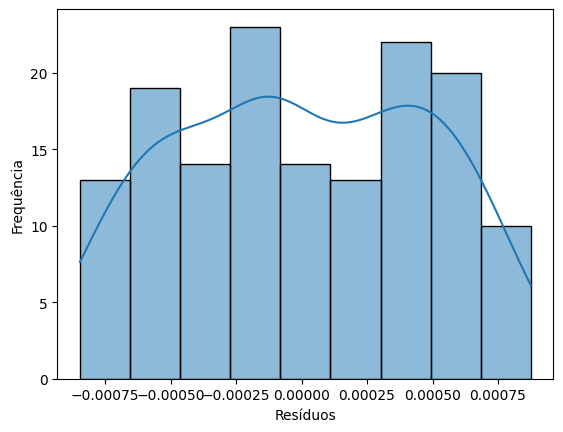

In [73]:
sns.histplot(modelo_comb_n_so.resid, kde=True)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
#plt.title("Histogram of Residuals")
plt.show()

### Escrever aqui

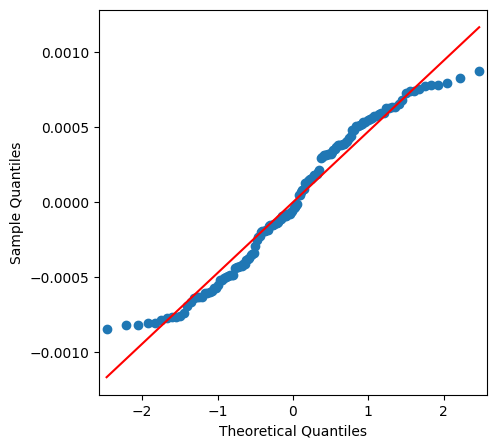

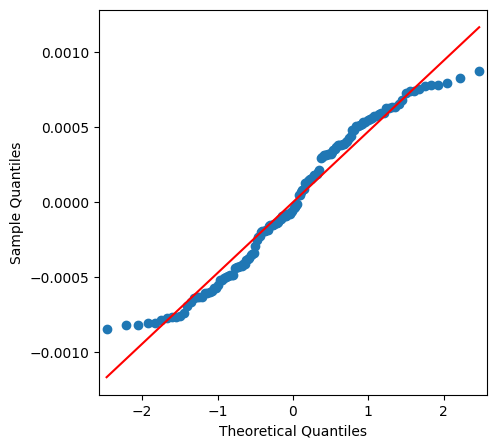

In [74]:
fig, ax = plt.subplots(figsize = (5,5), ncols=1)
sm.qqplot(modelo_comb_n_so.resid, line='s', ax = ax)

### Gráfico de Dispersão

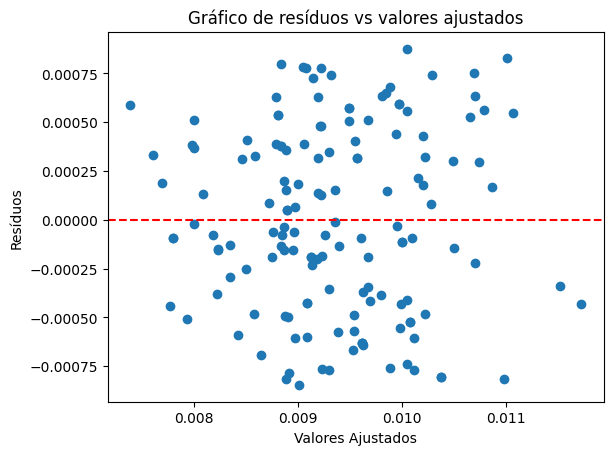

In [75]:
plt.scatter(modelo_comb_n_so.fittedvalues, modelo_comb_n_so.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados')
plt.title("Gráfico de resíduos vs valores ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.show()

### Distribuição dos Resíduos

In [76]:
dist_resid(modelo_comb_n_so)

0.5675675675675675 (68%) - 0.918918918918919 (90%) - 1.0 (95%)


(0.5675675675675675, 0.918918918918919, 1.0)

### Heterocedasticidade - Teste de Breusch-Pagan
Verifica se a heteroscedasticity dos resíduos está presente (hipótese nula)
ou seja, tem que dar maior do que 0,05.

In [77]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = sms.het_breuschpagan(modelo_comb_n_so.resid, modelo_comb_n_so.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 10.484336112447185),
 ('p-value', 0.033013441268435015),
 ('f-value', 2.725616889189253),
 ('f p-value', 0.0317178068731471)]

### Autocorrelação - Testde de Durbin-Watson
As a rule of thumb, test statistic values between the range
of 1.5 and 2.5 are considered normal. However, values outside
of this range could indicate that autocorrelation is a problem.

In [78]:
durbin_watson(modelo_comb_n_so.resid)

2.003042326742188

### Multicolinearidade

In [79]:
# Define the predictor variables
X = amostra_transf[modelo_n]

# Add a constant to the model (intercept)
X = add_constant(X)

# Calculate VIF for each feature. Até 5 = OK
datacamp_vif_data = pd.DataFrame()
datacamp_vif_data['Feature'] = X.columns
datacamp_vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(datacamp_vif_data)

     Feature         VIF
0      const  124.932174
1       Area    5.260783
2    Quartos    3.468571
3  Banheiros    1.466705
4      Vagas    2.875241
5   Unitario    1.862976
